# **General Introduction**

Image segmentation is a fundamental task in computer vision that goes beyond simple image classification by assigning a class label to each pixel in an image. Unlike classification, which outputs a single label per image, segmentation provides detailed spatial information, making it crucial for applications such as autonomous driving, medical imaging, and scene understanding.

The objective of this practical work is to construct image segmentation models using **transfer learning** to generate accurate ground-truth masks. Transfer learning leverages pre-trained models as backbones, allowing for faster convergence, improved performance, and reduced computational cost, especially when training data is limited.

In this TP, students will explore several advanced segmentation architectures. The first exercise focuses on the **U-Net architecture**, including enhancements with attention mechanisms and ResNet backbones. The second exercise addresses **DeepLabV3+**, experimenting with different backbones and output strides to optimize segmentation performance. Finally, the third exercise introduces **Generative Adversarial Networks (GANs)** for data augmentation, demonstrating how GANs can generate new images to enrich datasets and improve model generalization.

Throughout the TP, emphasis will be placed on **careful documentation, performance visualization, and in-depth result analysis**, using the COCO dataset as the benchmark. This work aims to provide practical experience in designing, training, and improving state-of-the-art segmentation models.

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!
✅ Mini-COCO créé avec 3000 images
loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


Epoch 1 Training: 100%|██████████| 150/150 [00:50<00:00,  2.96it/s]


Epoch 1: train_loss=0.5620, val_loss=0.6177, val_iou=0.4056
 Nouveau meilleur modèle sauvegardé (IoU=0.4056)


Epoch 2 Training: 100%|██████████| 150/150 [00:52<00:00,  2.87it/s]


Epoch 2: train_loss=0.4966, val_loss=0.4953, val_iou=0.2713


Epoch 3 Training: 100%|██████████| 150/150 [00:51<00:00,  2.92it/s]


Epoch 3: train_loss=0.4821, val_loss=0.4776, val_iou=0.3776


Epoch 4 Training: 100%|██████████| 150/150 [00:50<00:00,  2.95it/s]


Epoch 4: train_loss=0.4712, val_loss=0.4659, val_iou=0.3746


Epoch 5 Training: 100%|██████████| 150/150 [00:51<00:00,  2.92it/s]


Epoch 5: train_loss=0.4639, val_loss=0.4578, val_iou=0.3626


Epoch 6 Training: 100%|██████████| 150/150 [00:51<00:00,  2.92it/s]


Epoch 6: train_loss=0.4542, val_loss=0.4552, val_iou=0.3851


Epoch 7 Training: 100%|██████████| 150/150 [00:50<00:00,  2.94it/s]


Epoch 7: train_loss=0.4487, val_loss=0.4596, val_iou=0.4621
 Nouveau meilleur modèle sauvegardé (IoU=0.4621)


Epoch 8 Training: 100%|██████████| 150/150 [00:51<00:00,  2.93it/s]


Epoch 8: train_loss=0.4361, val_loss=0.4457, val_iou=0.4206


Epoch 9 Training: 100%|██████████| 150/150 [00:50<00:00,  2.95it/s]


Epoch 9: train_loss=0.4323, val_loss=0.4433, val_iou=0.4632
 Nouveau meilleur modèle sauvegardé (IoU=0.4632)


Epoch 10 Training: 100%|██████████| 150/150 [00:51<00:00,  2.92it/s]


Epoch 10: train_loss=0.4264, val_loss=0.4338, val_iou=0.4358


Epoch 11 Training: 100%|██████████| 150/150 [00:51<00:00,  2.94it/s]


Epoch 11: train_loss=0.4181, val_loss=0.4394, val_iou=0.3835


Epoch 12 Training: 100%|██████████| 150/150 [00:50<00:00,  2.94it/s]


Epoch 12: train_loss=0.4149, val_loss=0.4282, val_iou=0.4653
 Nouveau meilleur modèle sauvegardé (IoU=0.4653)


Epoch 13 Training: 100%|██████████| 150/150 [00:51<00:00,  2.93it/s]


Epoch 13: train_loss=0.4108, val_loss=0.4378, val_iou=0.3742


Epoch 14 Training: 100%|██████████| 150/150 [00:51<00:00,  2.93it/s]


Epoch 14: train_loss=0.4061, val_loss=0.4148, val_iou=0.4513


Epoch 15 Training: 100%|██████████| 150/150 [00:50<00:00,  2.96it/s]


Epoch 15: train_loss=0.4003, val_loss=0.4174, val_iou=0.4625


Epoch 16 Training: 100%|██████████| 150/150 [00:51<00:00,  2.90it/s]


Epoch 16: train_loss=0.3915, val_loss=0.4100, val_iou=0.4627


Epoch 17 Training: 100%|██████████| 150/150 [00:51<00:00,  2.93it/s]


Epoch 17: train_loss=0.3891, val_loss=0.4164, val_iou=0.4450


Epoch 18 Training: 100%|██████████| 150/150 [00:51<00:00,  2.94it/s]


Epoch 18: train_loss=0.3876, val_loss=0.4176, val_iou=0.5088
 Nouveau meilleur modèle sauvegardé (IoU=0.5088)


Epoch 19 Training: 100%|██████████| 150/150 [00:51<00:00,  2.93it/s]


Epoch 19: train_loss=0.3828, val_loss=0.3992, val_iou=0.4924


Epoch 20 Training: 100%|██████████| 150/150 [00:50<00:00,  2.94it/s]


Epoch 20: train_loss=0.3761, val_loss=0.4102, val_iou=0.4506


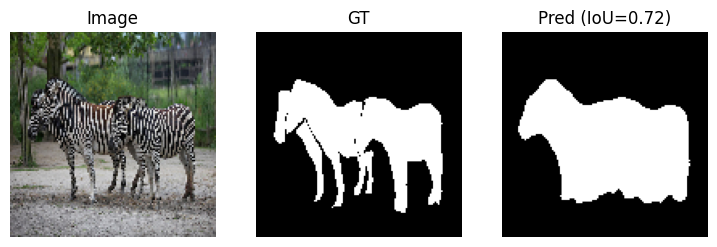

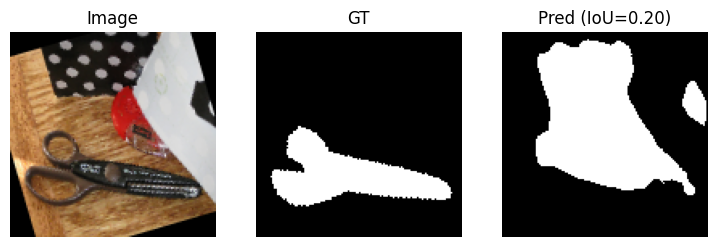

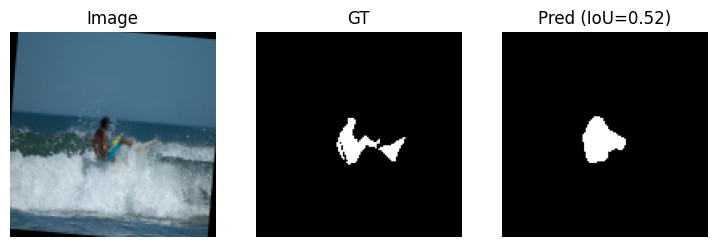

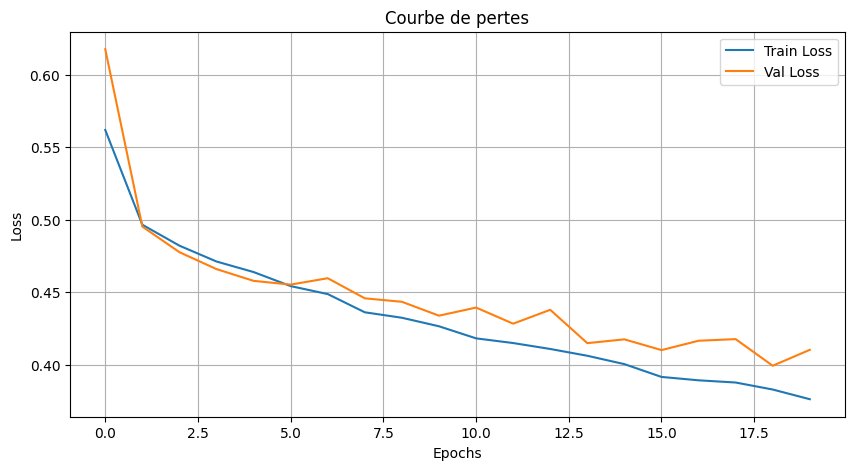

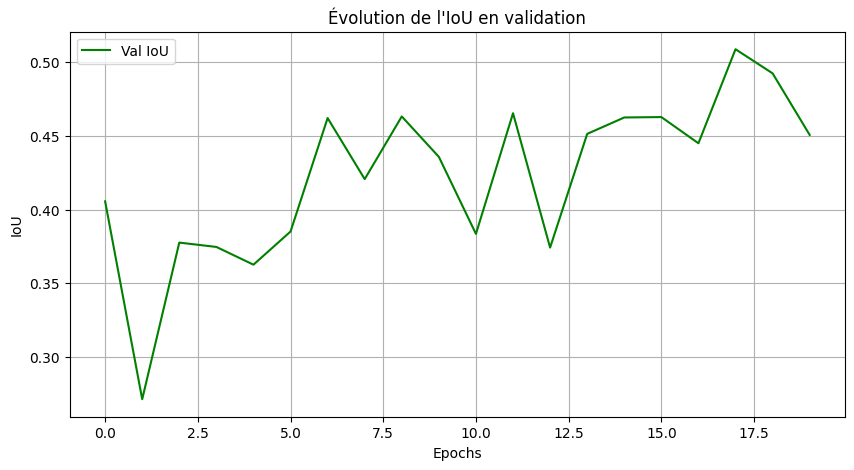

In [ ]:
import os
import random
import json
import requests
import zipfile
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from pycocotools.coco import COCO
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

# -----------------------------
# 1. Seed pour reproductibilité
# -----------------------------
random.seed(42)
torch.manual_seed(42)
np.random.seed(42)

# -----------------------------
# 2. Téléchargement Mini-COCO
# -----------------------------
def download_file(url, out_path):
    if out_path.exists():
        return
    r = requests.get(url, stream=True, timeout=30)
    r.raise_for_status()
    with open(out_path, "wb") as f:
        for chunk in r.iter_content(1024 * 1024):
            f.write(chunk)

def prepare_mini_coco(root="./mini_coco", n_samples=3000):
    root = Path(root)
    root.mkdir(parents=True, exist_ok=True)

    val_zip = root / "val2017.zip"
    ann_zip = root / "annotations_trainval2017.zip"

    download_file("http://images.cocodataset.org/zips/val2017.zip", val_zip)
    download_file("http://images.cocodataset.org/annotations/annotations_trainval2017.zip", ann_zip)

    if not (root / "val2017").exists():
        with zipfile.ZipFile(val_zip, "r") as z:
            z.extractall(root)
    if not (root / "annotations").exists():
        with zipfile.ZipFile(ann_zip, "r") as z:
            z.extractall(root)

    ann_file = root / "annotations" / "instances_val2017.json"
    coco = COCO(str(ann_file))
    img_ids = coco.getImgIds()
    random.shuffle(img_ids)
    img_ids = img_ids[:min(n_samples, len(img_ids))]
    imgs = coco.loadImgs(img_ids)

    ann_ids = coco.getAnnIds(imgIds=img_ids)
    anns = coco.loadAnns(ann_ids)
    cats = coco.loadCats(coco.getCatIds())

    mini_dict = {"images": imgs, "annotations": anns, "categories": cats}
    mini_ann_dir = root / "annotations_mini"
    mini_ann_dir.mkdir(exist_ok=True)
    with open(mini_ann_dir / "instances_val2017.json", "w") as f:
        json.dump(mini_dict, f)

    print(f"✅ Mini-COCO créé avec {len(imgs)} images")
    return root

root = prepare_mini_coco("./mini_coco", n_samples=3000)

# -----------------------------
# 3. Dataset PyTorch
# -----------------------------
class COCOSegDataset(Dataset):
    def __init__(self, img_dir, ann_file, img_size=128, augment=False):
        self.coco = COCO(ann_file)
        self.img_dir = img_dir
        self.img_ids = self.coco.getImgIds()
        self.tf = A.Compose([
            A.Resize(img_size, img_size),
            A.HorizontalFlip(p=0.5 if augment else 0.0),
            A.Rotate(limit=30, p=0.5 if augment else 0.0),
            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
            ToTensorV2()
        ])

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        info = self.coco.loadImgs([img_id])[0]
        path = os.path.join(self.img_dir, info['file_name'])
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        anns = self.coco.loadAnns(self.coco.getAnnIds(imgIds=[img_id]))
        mask = np.zeros((info['height'], info['width']), dtype=np.uint8)
        for ann in anns:
            mask = np.maximum(mask, self.coco.annToMask(ann))

        aug = self.tf(image=img, mask=mask)
        return aug["image"], aug["mask"].unsqueeze(0).float()

# Split 80/20
train_dir = "./mini_coco/val2017"
train_ann = "./mini_coco/annotations_mini/instances_val2017.json"
full_ds = COCOSegDataset(train_dir, train_ann, img_size=128, augment=True)
train_size = int(0.8 * len(full_ds))
val_size = len(full_ds) - train_size
train_ds, val_ds = torch.utils.data.random_split(full_ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False)

# -----------------------------
# 4. U-Net
# -----------------------------
class DoubleConv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )
    def forward(self, x): return self.block(x)

class Down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.mp = nn.MaxPool2d(2)
        self.conv = DoubleConv(in_ch, out_ch)
    def forward(self, x): return self.conv(self.mp(x))

class Up(nn.Module):
    def __init__(self, in_ch_x1, in_ch_x2, out_ch):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_ch_x1, in_ch_x2, 2, stride=2)
        self.conv = DoubleConv(in_ch_x2*2, out_ch)
    def forward(self, x1, x2):
        x1 = self.up(x1)
        x1 = F.interpolate(x1, size=x2.size()[2:], mode='nearest')
        return self.conv(torch.cat([x2, x1], dim=1))

class UNet(nn.Module):
    def __init__(self, n_classes=1):
        super().__init__()
        self.inc = DoubleConv(3, 64)
        self.down1, self.down2, self.down3, self.down4 = Down(64,128), Down(128,256), Down(256,512), Down(512,1024)
        self.up1, self.up2, self.up3, self.up4 = Up(1024,512,512), Up(512,256,256), Up(256,128,128), Up(128,64,64)
        self.outc = nn.Conv2d(64, n_classes, 1)
    def forward(self, x):
        x1,x2,x3,x4 = self.inc(x), None, None, None
        x2 = self.down1(x1); x3 = self.down2(x2); x4 = self.down3(x3); x5 = self.down4(x4)
        x = self.up1(x5,x4); x = self.up2(x,x3); x = self.up3(x,x2); x = self.up4(x,x1)
        return self.outc(x)

# -----------------------------
# 5. Entraînement
# -----------------------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(n_classes=1).to(DEVICE)
loss_fn = nn.BCEWithLogitsLoss()
opt = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', patience=3)

def iou_score(pred, target):
    pred = (pred > 0).float()
    intersection = (pred * target).sum()
    union = pred.sum() + target.sum() - intersection
    return (intersection + 1e-6) / (union + 1e-6)

best_val_iou = 0
patience, wait = 6, 0  # early stopping

train_losses, val_losses, val_ious = [], [], []  # <--- ajout

for epoch in range(20):  # seulement 20 époques
    model.train()
    train_loss = 0
    for imgs,masks in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
        imgs,masks = imgs.to(DEVICE), masks.to(DEVICE)
        opt.zero_grad()
        logits = model(imgs)
        loss = loss_fn(logits,masks)
        loss.backward(); opt.step()
        train_loss += loss.item()*imgs.size(0)
    train_loss /= len(train_loader.dataset)

    # Validation
    model.eval(); val_loss=0; val_iou=0
    with torch.no_grad():
        for imgs,masks in val_loader:
            imgs,masks = imgs.to(DEVICE), masks.to(DEVICE)
            logits = model(imgs)
            loss = loss_fn(logits,masks)
            val_loss += loss.item()*imgs.size(0)
            val_iou += iou_score(logits,masks)*imgs.size(0)
    val_loss /= len(val_loader.dataset)
    val_iou /= len(val_loader.dataset)

  # Sauvegarde dans les listes (convertir en float)
    train_losses.append(float(train_loss))
    val_losses.append(float(val_loss))
    val_ious.append(float(val_iou))

    print(f"Epoch {epoch+1}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}, val_iou={val_iou:.4f}")

    scheduler.step(val_loss)

    if val_iou > best_val_iou:
        best_val_iou = val_iou
        torch.save(model.state_dict(),"unet_best.pth")
        print(f" Nouveau meilleur modèle sauvegardé (IoU={val_iou:.4f})")
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(" Early stopping déclenché")
            break


# -----------------------------
# 6. Visualisation
# -----------------------------
model.load_state_dict(torch.load("unet_best.pth"))
model.eval()
imgs, masks = next(iter(val_loader))
imgs, masks = imgs.to(DEVICE), masks.to(DEVICE)
with torch.no_grad(): preds = torch.sigmoid(model(imgs))
preds = (preds>0.5).float()

mean = np.array([0.485,0.456,0.406]); std = np.array([0.229,0.224,0.225])
for i in range(3):
    img_denorm = imgs[i].cpu().permute(1,2,0).numpy()*std+mean
    img_denorm = np.clip(img_denorm,0,1)
    iou = iou_score(preds[i:i+1],masks[i:i+1])
    plt.figure(figsize=(9,3))
    plt.subplot(1,3,1); plt.imshow(img_denorm); plt.title("Image"); plt.axis('off')
    plt.subplot(1,3,2); plt.imshow(masks[i,0].cpu(),cmap="gray"); plt.title("GT"); plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(preds[i,0].cpu(),cmap="gray"); plt.title(f"Pred (IoU={iou:.2f})"); plt.axis('off')
    plt.show()
# -----------------------------
# 7. Courbes de pertes & IoU
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Courbe de pertes")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(val_ious, label="Val IoU", color="green")
plt.xlabel("Epochs")
plt.ylabel("IoU")
plt.title("Évolution de l'IoU en validation")
plt.legend()
plt.grid(True)
plt.show()

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!
loading annotations into memory...
Done (t=0.63s)
creating index...
index created!


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1 Val: 100%|██████████| 63/63 [00:11<00:00,  5.68it/s]


Epoch 1: train_loss=0.4483, val_loss=0.3949, val_iou=0.5213
 Best model saved (IoU=0.5213)


Epoch 2 Val: 100%|██████████| 63/63 [00:10<00:00,  5.74it/s]


Epoch 2: train_loss=0.3811, val_loss=0.3812, val_iou=0.5057


Epoch 3 Val: 100%|██████████| 63/63 [00:10<00:00,  6.19it/s]


Epoch 3: train_loss=0.3470, val_loss=0.3835, val_iou=0.5196


Epoch 4 Val: 100%|██████████| 63/63 [00:10<00:00,  5.92it/s]


Epoch 4: train_loss=0.3214, val_loss=0.3847, val_iou=0.4928


Epoch 5 Val: 100%|██████████| 63/63 [00:10<00:00,  5.87it/s]


Epoch 5: train_loss=0.3031, val_loss=0.3980, val_iou=0.5316
 Best model saved (IoU=0.5316)


Epoch 6 Val: 100%|██████████| 63/63 [00:10<00:00,  5.83it/s]


Epoch 6: train_loss=0.2860, val_loss=0.3897, val_iou=0.5195


Epoch 7 Val: 100%|██████████| 63/63 [00:10<00:00,  5.77it/s]


Epoch 7: train_loss=0.2721, val_loss=0.3961, val_iou=0.4998


Epoch 8 Val: 100%|██████████| 63/63 [00:10<00:00,  5.91it/s]


Epoch 8: train_loss=0.2681, val_loss=0.3919, val_iou=0.5370
 Best model saved (IoU=0.5370)


Epoch 9 Val: 100%|██████████| 63/63 [00:10<00:00,  5.85it/s]


Epoch 9: train_loss=0.2578, val_loss=0.3911, val_iou=0.5308


Epoch 10 Val: 100%|██████████| 63/63 [00:10<00:00,  5.89it/s]


Epoch 10: train_loss=0.2492, val_loss=0.4057, val_iou=0.5442
 Best model saved (IoU=0.5442)


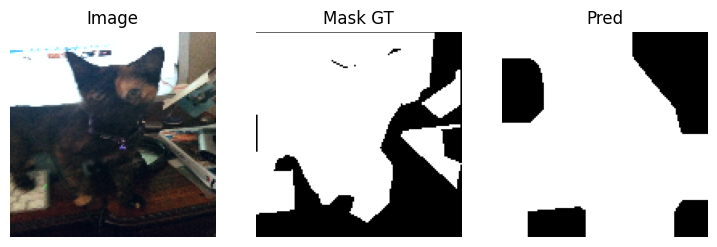

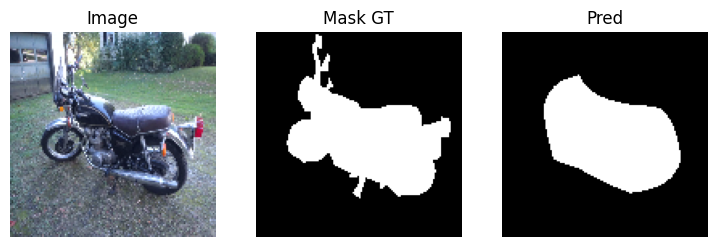

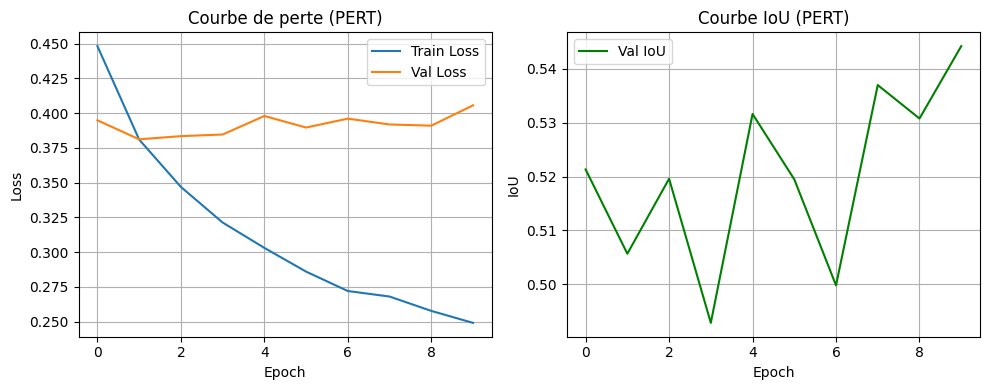

In [ ]:
import os, json, random, zipfile, requests
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

from albumentations import Compose, Resize, HorizontalFlip, Normalize
from albumentations.pytorch import ToTensorV2
from pycocotools.coco import COCO
import torchvision.models as models

# ------------------------------------------------------------
# 1. Mini-COCO Download + Preparation
# ------------------------------------------------------------
def download_file(url, out_path):
    if out_path.exists(): return
    r = requests.get(url, stream=True)
    with open(out_path, "wb") as f:
        for chunk in r.iter_content(1024*1024):
            f.write(chunk)

def prepare_mini_coco(root="./mini_coco", n_samples=5000):
    root = Path(root)
    root.mkdir(parents=True, exist_ok=True)

    val_zip = root/"val2017.zip"
    ann_zip = root/"annotations_trainval2017.zip"

    download_file("http://images.cocodataset.org/zips/val2017.zip", val_zip)
    download_file("http://images.cocodataset.org/annotations/annotations_trainval2017.zip", ann_zip)

    if not (root/"val2017").exists():
        with zipfile.ZipFile(val_zip, "r") as z: z.extractall(root)
    if not (root/"annotations").exists():
        with zipfile.ZipFile(ann_zip, "r") as z: z.extractall(root)

    ann_file = root/"annotations"/"instances_val2017.json"
    coco = COCO(str(ann_file))
    ids = coco.getImgIds()
    random.shuffle(ids)
    ids = ids[:n_samples]
    imgs = coco.loadImgs(ids)
    anns = coco.loadAnns(coco.getAnnIds(imgIds=ids))
    cats = coco.loadCats(coco.getCatIds())
    mini_dict = {"images": imgs, "annotations": anns, "categories": cats}
    out_ann = root/"annotations_mini"
    out_ann.mkdir(exist_ok=True)
    with open(out_ann/"instances_val2017.json","w") as f: json.dump(mini_dict,f)
    return root

root = prepare_mini_coco("./mini_coco", n_samples=5000)

# ------------------------------------------------------------
# 2. Dataset
# ------------------------------------------------------------
class COCOSegDataset(Dataset):
    def __init__(self, img_dir, ann_file, img_size=128, augment=False):
        self.coco = COCO(ann_file)
        self.img_dir = img_dir
        self.img_ids = self.coco.getImgIds()
        self.tf = Compose([
            Resize(img_size, img_size),
            HorizontalFlip(p=0.5 if augment else 0.0),
            Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
            ToTensorV2()
        ])

    def __len__(self): return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        info = self.coco.loadImgs([img_id])[0]
        path = os.path.join(self.img_dir, info["file_name"])
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        anns = self.coco.loadAnns(self.coco.getAnnIds(imgIds=[img_id]))
        mask = np.zeros((info["height"], info["width"]), np.uint8)
        for ann in anns: mask = np.maximum(mask, self.coco.annToMask(ann))
        aug = self.tf(image=img, mask=mask)
        return aug["image"], aug["mask"].long()

train_dir = "./mini_coco/val2017"
train_ann = "./mini_coco/annotations_mini/instances_val2017.json"
dataset = COCOSegDataset(train_dir, train_ann, img_size=128, augment=True)
n_train = int(0.8*len(dataset))
train_ds, val_ds = random_split(dataset, [n_train, len(dataset)-n_train])
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False)

# ------------------------------------------------------------
# 3. DeepLabv3+ (ResNet50 backbone, output_stride=16)
# ------------------------------------------------------------
class ASPP(nn.Module):
    def __init__(self, in_ch, out_ch, rates):
        super().__init__()
        self.convs = nn.ModuleList([
            nn.Conv2d(in_ch,out_ch,3,padding=r,dilation=r,bias=False) for r in rates
        ])
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(in_ch,out_ch,1,bias=False),
            nn.ReLU(inplace=True)
        )
        self.project = nn.Sequential(
            nn.Conv2d(len(rates)*out_ch+out_ch, out_ch, 1, bias=False),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5)
        )
    def forward(self,x):
        res=[conv(x) for conv in self.convs]
        gp=F.interpolate(self.global_pool(x), size=x.shape[2:], mode="bilinear", align_corners=False)
        res.append(gp)
        return self.project(torch.cat(res,dim=1))

class DeepLabV3Plus(nn.Module):
    def __init__(self,n_classes=2):
        super().__init__()
        resnet=models.resnet50(pretrained=True)
        self.backbone=nn.Sequential(
            resnet.conv1,resnet.bn1,resnet.relu,resnet.maxpool,
            resnet.layer1,resnet.layer2,resnet.layer3,resnet.layer4
        )
        self.aspp=ASPP(2048,256,[6,12,18])
        self.decoder=nn.Sequential(
            nn.Conv2d(256,256,3,padding=1,bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(256,n_classes,1)
        )
    def forward(self,x):
        h,w=x.shape[2:]
        f=self.backbone(x)
        x=self.aspp(f)
        x=self.decoder(x)
        return F.interpolate(x,size=(h,w),mode="bilinear",align_corners=False)

DEVICE="cuda" if torch.cuda.is_available() else "cpu"
model=DeepLabV3Plus(n_classes=2).to(DEVICE)

# ------------------------------------------------------------
# 4. Training
# ------------------------------------------------------------
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=1e-4)
best_iou=0

history = {"train_loss":[], "val_loss":[], "val_iou":[]}

def iou(pred,target,n_classes=2):
    pred=torch.argmax(pred,dim=1)
    inter=((pred==1)&(target==1)).sum().float()
    union=((pred==1)|(target==1)).sum().float()
    return (inter/union).item() if union>0 else 0

EPOCHS = 10
for epoch in range(EPOCHS):  # 10 epochs pour rapidité
    model.train(); train_loss=0
    for imgs,masks in tqdm(train_loader,desc=f"Epoch {epoch+1} Train"):
        imgs,masks=imgs.to(DEVICE),masks.to(DEVICE)
        optimizer.zero_grad()
        out=model(imgs)
        loss=criterion(out,masks)
        loss.backward(); optimizer.step()
        train_loss+=loss.item()*imgs.size(0)
    train_loss/=len(train_loader.dataset)

    model.eval(); val_loss=0; val_iou=0
    with torch.no_grad():
        for imgs,masks in tqdm(val_loader,desc=f"Epoch {epoch+1} Val"):
            imgs,masks=imgs.to(DEVICE),masks.to(DEVICE)
            out=model(imgs)
            loss=criterion(out,masks)
            val_loss+=loss.item()*imgs.size(0)
            val_iou+=iou(out,masks)*imgs.size(0)
    val_loss/=len(val_loader.dataset)
    val_iou/=len(val_loader.dataset)

    # save metrics
    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["val_iou"].append(val_iou)

    print(f"Epoch {epoch+1}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}, val_iou={val_iou:.4f}")
    if val_iou>best_iou:
        best_iou=val_iou
        torch.save(model.state_dict(),"deeplab_best.pth")
        print(f" Best model saved (IoU={val_iou:.4f})")

# ------------------------------------------------------------
# 5. Visualisation
# ------------------------------------------------------------
model.eval()
imgs,masks=next(iter(val_loader))
imgs,masks=imgs.to(DEVICE),masks.to(DEVICE)
with torch.no_grad(): preds=model(imgs)
preds=torch.argmax(preds,dim=1)

for i in range(2):
    img=imgs[i].cpu().permute(1,2,0).numpy()
    img=(img*0.229+0.485).clip(0,1)
    plt.figure(figsize=(9,3))
    plt.subplot(1,3,1); plt.imshow(img); plt.title("Image"); plt.axis("off")
    plt.subplot(1,3,2); plt.imshow(masks[i].cpu(),cmap="gray"); plt.title("Mask GT"); plt.axis("off")
    plt.subplot(1,3,3); plt.imshow(preds[i].cpu(),cmap="gray"); plt.title("Pred"); plt.axis("off")
    plt.show()
# ------------------------------------------------------------
# 6. Courbes PERT (Learning curves)
# ------------------------------------------------------------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Courbe de perte (PERT)")
plt.legend(); plt.grid()

plt.subplot(1,2,2)
plt.plot(history["val_iou"], label="Val IoU", color="green")
plt.xlabel("Epoch"); plt.ylabel("IoU")
plt.title("Courbe IoU (PERT)")
plt.legend(); plt.grid()

plt.tight_layout()
plt.show()

Epoch [1/150] | LossD=0.0205 | LossG=4.6883
Epoch [2/150] | LossD=0.0953 | LossG=5.8591
Epoch [3/150] | LossD=0.5897 | LossG=5.7734
Epoch [4/150] | LossD=0.1535 | LossG=3.8172
Epoch [5/150] | LossD=0.4744 | LossG=1.7447
Epoch [6/150] | LossD=0.8203 | LossG=2.8691
Epoch [7/150] | LossD=0.6762 | LossG=2.6764
Epoch [8/150] | LossD=0.6866 | LossG=2.5949
Epoch [9/150] | LossD=1.2334 | LossG=2.0388
Epoch [10/150] | LossD=0.9601 | LossG=1.2622
Epoch [11/150] | LossD=0.4926 | LossG=2.7940
Epoch [12/150] | LossD=0.6987 | LossG=2.2562
Epoch [13/150] | LossD=1.0929 | LossG=3.1014
Epoch [14/150] | LossD=0.7534 | LossG=1.4634
Epoch [15/150] | LossD=0.9660 | LossG=1.2711
Epoch [16/150] | LossD=0.8155 | LossG=1.4873
Epoch [17/150] | LossD=0.7119 | LossG=1.7931
Epoch [18/150] | LossD=0.9685 | LossG=0.7770
Epoch [19/150] | LossD=0.6357 | LossG=2.2482
Epoch [20/150] | LossD=0.8062 | LossG=1.7889
Epoch [21/150] | LossD=1.1306 | LossG=1.3360
Epoch [22/150] | LossD=0.8180 | LossG=1.5477
Epoch [23/150] | Lo

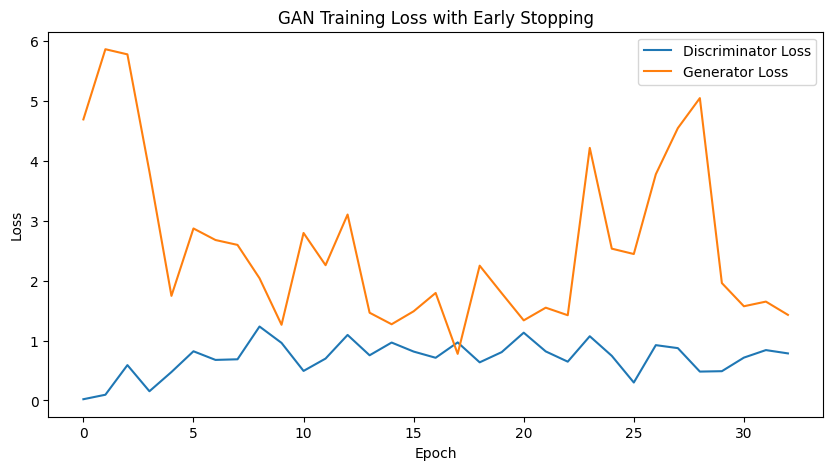

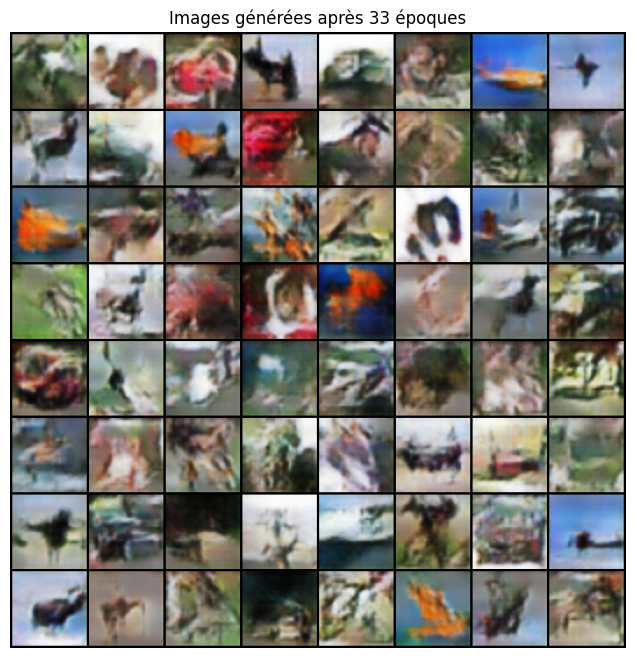

In [ ]:
import os, torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# -----------------------------
# 1. Paramètres
# -----------------------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMAGE_SIZE = 64
BATCH_SIZE = 64
LATENT_DIM = 100
EPOCHS = 150
N_SAMPLES = 8000   # nombre d’images utilisées
PATIENCE = 15      # nombre d'époques sans amélioration avant arrêt

os.makedirs("gan_outputs", exist_ok=True)

# -----------------------------
# 2. Dataset (CIFAR-10 auto-download + subset)
# -----------------------------
transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
indices = torch.randperm(len(dataset))[:N_SAMPLES]
subset = Subset(dataset, indices)
dataloader = DataLoader(subset, batch_size=BATCH_SIZE, shuffle=True)

# -----------------------------
# 3. Générateur
# -----------------------------
class Generator(nn.Module):
    def __init__(self, latent_dim=100, ngf=64, nc=3):
        super().__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, ngf*8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf*8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf*8, ngf*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf*4, ngf*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf*2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )
    def forward(self, z):
        return self.main(z)

# -----------------------------
# 4. Discriminateur
# -----------------------------
class Discriminator(nn.Module):
    def __init__(self, nc=3, ndf=64):
        super().__init__()
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf, ndf*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf*2, ndf*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf*4, ndf*8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf*8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf*8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.main(x).view(-1, 1)

# -----------------------------
# 5. Initialisation
# -----------------------------
netG = Generator(LATENT_DIM).to(DEVICE)
netD = Discriminator().to(DEVICE)

def weights_init(m):
    if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
        nn.init.normal_(m.weight.data, 0.0, 0.02)

netG.apply(weights_init)
netD.apply(weights_init)

criterion = nn.BCELoss()
optG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))
optD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))

fixed_noise = torch.randn(64, LATENT_DIM, 1, 1, device=DEVICE)

# -----------------------------
# 6. Entraînement avec suivi des pertes + Early Stopping
# -----------------------------
lossesG, lossesD = [], []
best_lossG = float("inf")
patience_counter = 0
last_epoch = 0 # Keep track of the last completed epoch

for epoch in range(EPOCHS):
    for i, (imgs, _) in enumerate(dataloader):
        real_labels = torch.ones(imgs.size(0), 1, device=DEVICE)
        fake_labels = torch.zeros(imgs.size(0), 1, device=DEVICE)

        # --- Train Discriminateur ---
        netD.zero_grad()
        real_imgs = imgs.to(DEVICE)
        output_real = netD(real_imgs)
        loss_real = criterion(output_real, real_labels)

        noise = torch.randn(imgs.size(0), LATENT_DIM, 1, 1, device=DEVICE)
        fake_imgs = netG(noise)
        output_fake = netD(fake_imgs.detach())
        loss_fake = criterion(output_fake, fake_labels)

        lossD = loss_real + loss_fake
        lossD.backward()
        optD.step()

        # --- Train Générateur ---
        netG.zero_grad()
        output = netD(fake_imgs)
        lossG = criterion(output, real_labels)
        lossG.backward()
        optG.step()

    # Sauvegarde des pertes
    lossesD.append(lossD.item())
    lossesG.append(lossG.item())
    last_epoch = epoch + 1 # Update the last completed epoch

    print(f"Epoch [{epoch+1}/{EPOCHS}] | LossD={lossD.item():.4f} | LossG={lossG.item():.4f}")

    # Early stopping sur le Générateur
    if lossG.item() < best_lossG:
        best_lossG = lossG.item()
        patience_counter = 0
        # Sauvegarde du meilleur modèle
        torch.save(netG.state_dict(), "gan_outputs/best_generator.pth")
        torch.save(netD.state_dict(), "gan_outputs/best_discriminator.pth")
    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print(f"Early stopping déclenché à l'époque {epoch+1}")
            break

    # Sauvegarde d’images générées
    with torch.no_grad():
        fake = netG(fixed_noise).detach().cpu()
    utils.save_image(fake, f"gan_outputs/fake_epoch{epoch+1}.png", normalize=True, nrow=8)

    if patience_counter >= PATIENCE:
        break

# -----------------------------
# 7. Courbes de pertes
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(lossesD, label="Discriminator Loss")
plt.plot(lossesG, label="Generator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("GAN Training Loss with Early Stopping")
plt.legend()
plt.show()

# -----------------------------
# 8. Résultats visuels
# -----------------------------
# Récupérer le dernier epoch exécuté (après early stopping)
last_epoch = len(lossesG)

# Charger l'image générée du dernier epoch sauvegardé
last_fake = f"gan_outputs/fake_epoch{last_epoch}.png"
if os.path.exists(last_fake):
    img = mpimg.imread(last_fake)

    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Images générées après {last_epoch} époques")
    plt.show()
else:
    print(f"⚠️ Image non trouvée : {last_fake}")


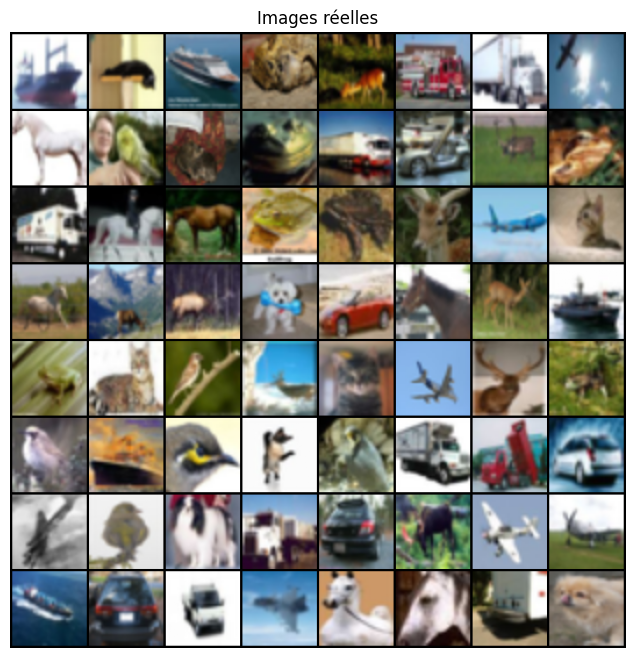

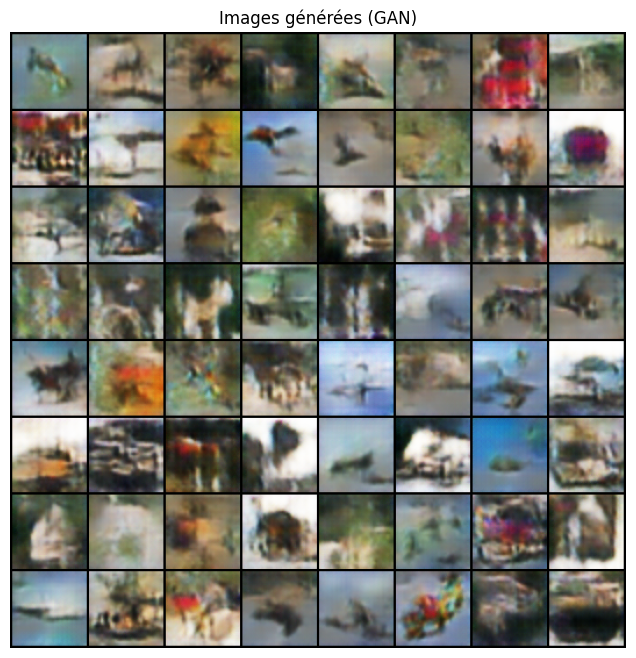

In [ ]:
import matplotlib.pyplot as plt
import torchvision

# ------------------------------------------------------------
# 7. Visualisation
# ------------------------------------------------------------
def show_images(images, nrow=8, title=""):
    plt.figure(figsize=(8,8))
    grid = torchvision.utils.make_grid(images, nrow=nrow, normalize=True)
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.axis("off")
    if title: plt.title(title)
    plt.show()

# --- Visualiser des images réelles ---
real_batch = next(iter(dataloader))
real_images, _ = real_batch
show_images(real_images[:64], title="Images réelles")

# --- Visualiser des images générées après entraînement ---
with torch.no_grad():
    fake_images = netG(fixed_noise).cpu()
show_images(fake_images, title="Images générées (GAN)")
